In [1]:
import json
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from datetime import datetime,timedelta
import random
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import PorterStemmer

In [2]:
user_index = json.load(open("../data/user_index.json",'r'))
commitment_index = json.load(open("../data/commitment_index.json",'r'))

In [3]:
max_user_id = max([int(i) for i in user_index.keys()])

In [4]:
for k,v in tqdm(user_index.items()):
    user_index[k]['date'] = datetime.strptime(v['date'], '%d %b %Y')

  0%|          | 0/521632 [00:00<?, ?it/s]

In [5]:
id_for_1_jan_2023 = 722621
for k,v in tqdm(user_index.items()):
    if int(k)<id_for_1_jan_2023 and v['date'].year == 2023:
        user_index[k]['date'] = None

  0%|          | 0/521632 [00:00<?, ?it/s]

In [6]:
last_date = user_index['1']['date']
for i in range(1, max_user_id+1):
    if str(i) in user_index.keys():
        if user_index[str(i)]['date'] == None:
            user_index[str(i)]['date'] = last_date
        else:
            last_date = user_index[str(i)]['date']

In [7]:
for k,v in tqdm(commitment_index.items()):
    commitment_index[k]['start_date'] = datetime.strptime(v['start_date'], '%B %d, %Y')
    commitment_index[k]['end_date'] = datetime.strptime(v['end_date'], '%B %d, %Y')

  0%|          | 0/319928 [00:00<?, ?it/s]

In [8]:
for k,v in tqdm(commitment_index.items()):
    if v['start_date'].year < 2007:
        deta = v['end_date'] - v['start_date']
        commitment_index[k]['start_date'] = user_index[str(v['user_id'])]['date']
        commitment_index[k]['end_date'] = commitment_index[k]['start_date'] + deta

  0%|          | 0/319928 [00:00<?, ?it/s]

Extract data

In [266]:
len(commitment_index)

319928

In [267]:
ps = PorterStemmer()

In [268]:
def preprocess_title(title):
    title = title.replace("/"," ")
    tokens = nltk.word_tokenize(title)
    tokens = [i.lower() for i in tokens]
    tokens = [i.translate(str.maketrans('', '', string.punctuation)) for i in tokens]
    tokens = [ps.stem(i) for i in tokens]
    return tokens

In [269]:
term_dict = {
    "weight":["weight","diet","fat", "pound", "kg", "calories",'kilos','pounds','kcal'],
    "eat":["eat","chocolate", "water", "food", "sugar", "softdrinks", "candy", "desserts", "veggies","gluten", "lactose", "snacking", "coffee","beverage","shakes", "caffeine"],
    "exercise":["exercise","run", "walk","race", "cycling","work-out","workout", "bicyclng","gym","km","steps", 'miles',"fitness", "yoga",'cardio','squats','deadlift',"climbing", "hike","pushup","pullup","healthy"],
    "smoking":["smoking"],
    "alcohol":['alcohol','drink','beer','wine','booze'],
    "sleep":["sleep","bed","wake",'asleep','nap'],
    "read":["read","book"],
    "study":["study","exam","diploma", "phd", "assignment", "math","gmat",'homework', 'gre', 'sat', 'school', 'learn',"thesis", "degree",'certification', "preparation","dissertation", "class", "course","english","french","spanish","java","experiments"],
    "write":["write","draft", "screenplay","scripts",'copywriting'],
    "mastrubate":["mastrubate","mastrubation","porn","masturbation",'nofap','fap','porngraphy'],
    "meditate":["meditate","journal"],
    "money":["money","finance","saving", "expense", "spending", "earn", "save",'budget','buy','invest','cash','debt'],
    "nail":["nail","hair", "brush", "floss","shower"],
    "client":["client","job","business",'network', "inbox", "emails",'career'],
    "procrastinating":["procrastinating","procrastinate","procrastination",'productive'],
    "clean":["clean","laundry", "tidy"],
    "internet":["internet", "electronics",'tv','phone',"mobile", "games"]
}

In [270]:
term_dict_n_gram = {
    "weight":['in shape'],
    "exercise":["work out", "push up", "pull up"],
    "sleep":['wake up','get up'],
    "internet":["social media"]
}

In [271]:
term_dict = {k:[ps.stem(i) for i in v] for k,v in term_dict.items()}

In [272]:
count_dict = {k:[] for k in term_dict.keys()}

In [273]:
for k,v in tqdm(commitment_index.items()):
    pre_title = preprocess_title(v['title'])
    for t,rt in term_dict.items():
        for ct in rt:
            if ct in pre_title:
                count_dict[t].append(k)
                
    pre_title = " ".join(pre_title)
    for t,rt in term_dict_n_gram.items():
        for ct in rt:
            if ct in pre_title:
                count_dict[t].append(k)
                
    if "$" in v['title']:
        count_dict['money'].append(k)

  0%|          | 0/319928 [00:00<?, ?it/s]

In [274]:
for k,v in count_dict.items():
    print(f"{k} {len(v)}")

weight 89513
eat 12496
exercise 72178
smoking 8512
alcohol 5228
sleep 9397
read 8059
study 18815
write 6080
mastrubate 2003
meditate 5317
money 11071
nail 1449
client 3711
procrastinating 1877
clean 1653
internet 2330


In [275]:
len(set([j for v in count_dict.values() for j in v]))

236581

In [276]:
len(set([j for v in count_dict.values() for j in v]))/len(commitment_index)

0.7394820084519017

In [277]:
for k,v in count_dict.items():
    print("-"*100)
    print(k)
    for j in random.sample(v,min(5,len(v))):
        print(commitment_index[j]['title'])

----------------------------------------------------------------------------------------------------
weight
Maintain Weight
Lose Weight
Lose Weight
Lose Weight
Lose Weight
----------------------------------------------------------------------------------------------------
eat
Eat fat less
Honor my brightlines! No sugar / No...
Drink more water
Drink less coffee
Bright Line Eating
----------------------------------------------------------------------------------------------------
exercise
Exercise Regularly
Exercise Regularly
I will lose weight and get healthy
30 Squats Everyday
Exercise Regularly
----------------------------------------------------------------------------------------------------
smoking
No smoking
Quit Smoking
Quit Smoking
Quit Smoking
Quit Smoking
----------------------------------------------------------------------------------------------------
alcohol
Do not drink alcohol at home.
Drink more water.
Drink more water.
drink enough water daily
Low Carb/Low Alcohol: 25

In [278]:
res = list(combinations(count_dict.keys(), 2))
total_intersection_count = 0
for i in res:
    intersection_count = set.intersection(*[set(count_dict[j]) for j in i])
    total_intersection_count+=len(intersection_count)
    if len(intersection_count)>0:
        print("-"*50)
        print(f"{i} {len(intersection_count)}")
        for s in random.sample(list(intersection_count),min(5,len(intersection_count))):
            print(commitment_index[s]['title'])

--------------------------------------------------
('weight', 'eat') 372
Lose Weight, Eat Healthy, and Exerc...
Eat a Paleo Diet
Eat Healthier to lose weight
No added sugar in my diet
losing weight, eating right and exe...
--------------------------------------------------
('weight', 'exercise') 505
Workout and Diet Goal
Exercise and weight loss
Sleep, Diet, and Exercise
Diet and exercise to get rid of the...
Eat Healthy...& Lose Weight!
--------------------------------------------------
('weight', 'smoking') 6
Weight loss and Quit Smoking
Quit smoking, lose weight, do well ...
quit smoking & lose weight
quit smoking & lose weight
quit smoking and reach my weight go...
--------------------------------------------------
('weight', 'alcohol') 64
Weight and booze
Stop drinking Diet Coke
Stop Drinking Diet Coke
SB diet phase I + no alcohol
Drink less than 4 cans of Diet Coke...
--------------------------------------------------
('weight', 'sleep') 8
bed and weights
lose weight, exercise, b

In [279]:
total_intersection_count

8096

In [280]:
res = list(combinations(count_dict.keys(), 3))
total_intersection_count = 0
for i in res:
    intersection_count = set.intersection(*[set(count_dict[j]) for j in i])
    total_intersection_count+=len(intersection_count)
    if len(intersection_count)>0:
        print("-"*50)
        print(f"{i} {len(intersection_count)}")
        for s in random.sample(list(intersection_count),min(5,len(intersection_count))):
            print(commitment_index[s]['title'])

--------------------------------------------------
('weight', 'eat', 'exercise') 76
Diet and healthy eating
Diet & Healthy Eating
Eat Healthy and Lose Weight
Diet & Healthy Eating
Eat 1700 Calories and walk 5000 ste...
--------------------------------------------------
('weight', 'eat', 'alcohol') 7
Diary my food, drink, and weight fo...
Drink my weight in ounces of water ...
Drink half my weight in water daily...
I will not drink diet soda, eat dee...
Diary my food, drink, and weight fo...
--------------------------------------------------
('weight', 'eat', 'money') 2
follow diet (exercise, food, budget...
Stick to my diet and not buy food a...
--------------------------------------------------
('weight', 'eat', 'client') 1
Career Diet & Healthy Eating Edu...
--------------------------------------------------
('weight', 'eat', 'clean') 6
Eating clean/Lose weight by Oct 1
Clean eating for health and weight ...
stick to diet and eat clean
Eat Clean and lost weight.
Lose weight, Eat clea

--------------------------------------------------
('exercise', 'study', 'money') 8
Get healthy, save money and study h...
Get healthy, save money and study h...
save money, get healthy, study more...
Get healthy, save money and study h...
Get healthy, save money and study h...
--------------------------------------------------
('exercise', 'study', 'procrastinating') 2
Be productive, Learn more,exercise ...
Be productive - study and workout
--------------------------------------------------
('exercise', 'meditate', 'nail') 1
Habits (workout, cold shower, medit...
--------------------------------------------------
('exercise', 'meditate', 'clean') 1
Journal, meditate/yoga, eat clean
--------------------------------------------------
('smoking', 'alcohol', 'mastrubate') 1
No smoking, fapping, drinking(accep...
--------------------------------------------------
('alcohol', 'sleep', 'nail') 1
Eat & Drink & Sleep & Brush Teeth
--------------------------------------------------
('alcohol', 

In [281]:
total_intersection_count

287

In [293]:
res = list(combinations(count_dict.keys(), 4))
total_intersection_count = 0
for i in res:
    intersection_count = set.intersection(*[set(count_dict[j]) for j in i])
    total_intersection_count+=len(intersection_count)
    if len(intersection_count)>0:
        print("-"*50)
        print(f"{i} {len(intersection_count)}")
        for s in random.sample(list(intersection_count),min(5,len(intersection_count))):
            print(commitment_index[s]['title'])

--------------------------------------------------
('weight', 'eat', 'exercise', 'money') 1
follow diet (exercise, food, budget...
--------------------------------------------------
('weight', 'eat', 'exercise', 'client') 1
Career Diet & Healthy Eating Edu...
--------------------------------------------------
('weight', 'exercise', 'read', 'nail') 1
Running, Weights, No Nails, Reading...
--------------------------------------------------
('eat', 'exercise', 'sleep', 'write') 1
Sleep exercise write eat healthy
--------------------------------------------------
('eat', 'exercise', 'meditate', 'clean') 1
Journal, meditate/yoga, eat clean
--------------------------------------------------
('eat', 'alcohol', 'sleep', 'nail') 1
Eat & Drink & Sleep & Brush Teeth


In [294]:
total_intersection_count

6

# where breakes

In [284]:
classified = set([j for v in count_dict.values() for j in v])

In [285]:
len(classified)

236581

In [286]:
not_classified = set(commitment_index.keys())-classified

In [287]:
len(not_classified)

83347

In [292]:
for k in random.sample(list(not_classified),10):
    print(commitment_index[k]['title'])

Finish Lean in by Aug 3rd,2013
karele ka juice
Get to 195 lbs
60m work
Watch one Mixergy episode every Sun...
Get m to 100 numbers by 5/31/15
Transcribe Interviews
Stop Picking Completely.
No Dairy
Schedule out everything


# Analysis

# Summary Table

In [302]:
count_df = []
for k,v in count_dict.items():
    count_df.append([k,len(set(v)),len(set(v))*100/len(commitment_index)])
    
count_df.append(["Not Classified",len(not_classified), len(not_classified)*100/len(commitment_index)])

In [303]:
pd.DataFrame(count_df, columns=['Class','Count',"%"]).sort_values("Count",ascending=False)

,Class,Count,%
0,weight,88877,27.780313
17,Not Classified,83347,26.051799
2,exercise,71152,22.240004
7,study,16898,5.281813
1,eat,11361,3.551112
3,smoking,8512,2.660599
6,read,6674,2.086094
11,money,6570,2.053587
5,sleep,6498,2.031082
8,write,5912,1.847916


Year wise

In [334]:
# year_count = {i:{k:0 for k in count_dict.keys()} for i in range(2007,2024)}
year_count = {k:{i:0 for i in range(2007,2024)} for k in count_dict.keys()}
total_year = {i:0 for i in range(2007,2024)}

In [335]:
for k,v in count_dict.items():
    for i in set(v):
        year_count[k][commitment_index[i]['start_date'].year]+=1
        total_year[commitment_index[i]['start_date'].year]+=1

In [336]:
for k,v in year_count.items():
    for y,c in v.items():
        year_count[k][y]=c*100/total_year[y]

In [337]:
year_data = pd.DataFrame.from_dict(year_count)

In [338]:
year_data['year'] = year_data.index

In [339]:
year_data

,weight,eat,exercise,smoking,alcohol,sleep,read,study,write,mastrubate,meditate,money,nail,client,procrastinating,clean,internet,year
2007,15.789474,0.000000,31.578947,39.473684,0.000000,0.000000,5.263158,0.000000,2.631579,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,2.631579,0.000000,2007
2008,52.919255,2.337662,27.690570,3.839639,0.824393,0.767928,0.937324,3.613778,1.118012,0.022586,0.383964,3.162055,0.587239,0.564653,0.191982,0.553360,0.485601,2008
2009,53.413866,3.981092,25.052521,3.382353,1.228992,0.892857,1.355042,3.739496,1.481092,0.042017,0.556723,2.342437,0.357143,1.039916,0.294118,0.399160,0.441176,2009
2010,56.018393,2.650798,25.191597,3.281940,0.910648,0.838518,1.460644,3.065549,1.442611,0.063114,0.459832,2.335227,0.261473,0.964746,0.180326,0.495898,0.378685,2010
2011,49.095741,3.377196,26.913852,3.513321,1.121411,1.523303,1.737214,4.991249,1.873339,0.077786,0.589875,2.450250,0.395411,1.147339,0.194464,0.544500,0.453750,2011
2012,46.576537,3.636066,26.831662,3.341692,1.351941,1.891627,1.668120,5.614915,2.142390,0.245312,0.735935,2.791103,0.294374,1.335587,0.272569,0.517881,0.752290,2012
2013,41.311968,3.685528,27.416124,3.139710,1.722584,2.348523,1.997997,7.255884,2.493741,0.475714,1.036555,3.079619,0.405608,1.707561,0.430646,0.736104,0.756134,2013
2014,39.416165,5.007090,27.949734,3.809105,1.833651,2.107476,2.215051,7.251479,2.180822,0.660114,1.149088,2.982739,0.371620,1.383795,0.352061,0.625886,0.704122,2014
2015,31.955207,4.193988,33.845695,4.121604,1.754237,2.303500,2.669676,8.111215,2.273695,0.651452,1.358256,2.980499,0.472622,1.468960,0.391723,0.740867,0.706804,2015
2016,30.733867,4.392985,32.347182,3.805551,1.817640,2.566831,3.013792,8.743402,2.771156,0.808786,2.166695,2.745616,0.481015,1.575004,0.591691,0.706624,0.732164,2016


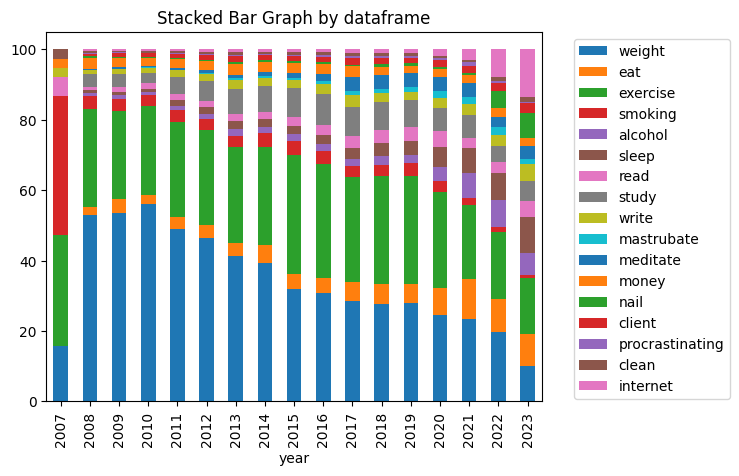

In [340]:
year_data.plot(x='year', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')